In [2]:
%matplotlib inline
from scipy.optimize import *
from scipy.signal import *
from numpy import *
from matplotlib.pyplot import *


### Functions we will be using

In [3]:
dt = 0.005

# TODO: Motion of the particles
def x_motion_U1(time, x0):
    x = zeros(len(time))
    v = zeros(len(time))
    x[0] = x0
    for i in range(1, len(time)):
        x_prime = x[i - 1] + 0.5 * v[i - 1] * dt
        v_prime = v[i - 1] + 0.5 * (2 * pi ** 2 * (x_prime - x_prime ** 3)) * dt

        x[i] = x[i - 1] + v_prime * dt
        v[i] = v[i - 1] + (2 * pi ** 2 * (x_prime - x_prime ** 3)) * dt

    return x, v


# Motion with damping force and driving force 
def x_motion2_U1(time, x0, f0, gamma, omega):
    x = zeros(len(time))
    v = zeros(len(time))
    x[0] = x0
    for i in range(1, len(time)):
        tprime = time[i-1] + 0.5 * dt
        x_prime = x[i-1] + 0.5 * v[i - 1] * dt
        v_prime = v[i-1] + 0.5 * (2 * pi**2 * (x_prime - x_prime ** 3) - gamma * v[i-1] + f0 * cos(omega * tprime)) * dt 

        x[i] = x[i - 1] + v_prime * dt
        v[i] = v[i - 1] + (2 * pi ** 2 * (x_prime - x_prime ** 3) - gamma * v_prime + f0 * cos(omega * tprime)) * dt

    return x, v   


def x_motion_U2(time, x0):
    x = zeros(len(time))
    v = zeros(len(time))
    x[0] = x0
    for i in range(1, len(time)):
        x_prime = x[i - 1] + 0.5 * v[i - 1] * dt
        v_prime = v[i - 1] + 0.5 * (-pi ** 2 * (x_prime - x_prime ** (-3))) * dt

        x[i] = x[i - 1] + v_prime * dt
        v[i] = v[i - 1] + (-pi ** 2 * (x_prime - x_prime ** (-3))) * dt

    return x, v


# Motion with damping force and driving force 
def x_motion2_U2(time, x0, f0, gamma, omega):
    x = zeros(len(time))
    v = zeros(len(time))
    x[0] = x0
    for i in range(1, len(time)):
        tprime = time[i-1] + 0.5 * dt
        x_prime = x[i - 1] + 0.5 * v[i - 1] * dt
        v_prime = v[i - 1] + 0.5 * (-pi ** 2 * (x_prime - x_prime ** (-3)) - gamma * v[i-1] + f0 * cos(omega * tprime)) * dt

        x[i] = x[i - 1] + v_prime * dt
        v[i] = v[i - 1] + (-pi ** 2 * (x_prime - x_prime ** (-3)) - gamma * v_prime + f0 * cos(omega * tprime)) * dt

    return x, v


def x_motion_U3(time, x0):
    x = zeros(len(time))
    v = zeros(len(time))
    x[0] = x0
    for i in range(1, len(time)):
        x_prime = x[i - 1] + 0.5 * v[i - 1] * dt
        v_prime = v[i - 1] + 0.5 * ((2 * pi ** 2) / 3 * (1 / x_prime ** 3 - x_prime ** 3)) * dt

        x[i] = x[i - 1] + v_prime * dt
        v[i] = v[i - 1] + ((2 * pi ** 2) / 3 * (1 / (x_prime ** 3) - x_prime ** 3)) * dt

    return x, v


# Motion with damping force and driving force 
def x_motion2_U3(time, x0, f0, gamma, omega):
    x = zeros(len(time))
    v = zeros(len(time))
    x[0] = x0
    for i in range(1, len(time)):
        tprime = time[i-1] + 0.5 * dt
        x_prime = x[i - 1] + 0.5 * v[i - 1] * dt
        v_prime = v[i - 1] + 0.5 * ((2 * pi ** 2) / 3 * (1 / x_prime ** 3 - x_prime ** 3) - gamma * v[i-1] + f0 * cos(omega * tprime)) * dt

        x[i] = x[i - 1] + v_prime * dt
        v[i] = v[i - 1] + ((2 * pi ** 2) / 3 * (1 / (x_prime ** 3) - x_prime ** 3) - gamma * v_prime + f0 * cos(omega * tprime)) * dt

    return x, v


# TODO: FOURIER TRANSFORM
def fourier(time, x):
    ft = fft.rfft(x)
    freqs = fft.rfftfreq(len(x), time[1] - time[0])
    mags = abs(ft)

    return [freqs, mags]


# TODO: Finding the fundamental frequencies
def energy_frequency(x0_list):
    t0, tf, dt = 0, 150, 0.005
    time = arange(t0, tf+dt, dt)

    fund_freq_list1 = []
    energy_list1 = []
    fund_freq_list2 = []
    energy_list2 = []
    fund_freq_list3 = []
    energy_list3 = []
    
    for x0 in x0_list:
        # Getting and Storing the velocities and x values
        x1 = x_motion_U1(time, x0)[0]
        v1 = x_motion_U1(time, x0)[1]
        x2 = x_motion_U2(time, x0)[0]
        v2 = x_motion_U2(time, x0)[1]
        x3 = x_motion_U3(time, x0)[0]
        v3 = x_motion_U3(time, x0)[1]   

        # Finding the components of the energy
        u1 = 2 * pi ** 2 * ((x1 ** 4) / 4 - (x1 ** 2) / 2 + 1 / 4)
        k1 = 0.5 * v1 ** 2
        u2 = pi ** 2 * (1 / (2 * x2 ** 2) + (x2 ** 2) / 2 - 1)
        k2 = 0.5 * v2 ** 2
        u3 = pi ** 2 * (1 / (2 * x3 ** 2) + (x3 ** 2) / 2 - 1)
        k3 = 0.5 * v3 ** 2    

        # Adding the energies to their respective lists
        energy_list1.append(mean(u1 + k1))  # we take the average because we get small fluctuations in energy
        energy_list2.append(mean(u2 + k2))
        energy_list3.append(mean(u3 + k3))
        
        # Getting the fundamental frequencies
        result1 = fourier(time, x1)
        frequencies1 = result1[0][argrelmax(result1[1])[0]]  # argrelmax(result[1])[0] returns the array positions of maxima
        fund_freq_list1.append(frequencies1[0]-1)
        # fund_freq_list1.append(frequencies[0])
        
        result2 = fourier(time, x2)
        frequencies2 = result2[0][argrelmax(result2[1])[0]]
        fund_freq_list2.append(frequencies2[0]-1)
        # we find 1-frequencies[0] bc we want to show the shift of the fundamental frequency 
        # is proportional to the energy
        # fund_freq_list2.append(frequencies[0])
        
        result3 = fourier(time, x3)
        frequencies3 = result3[0][argrelmax(result3[1])[0]]
        fund_freq_list3.append(frequencies3[0]-1)
        # fund_freq_list3.append(frequencies[0])
        
    return [fund_freq_list1, energy_list1, fund_freq_list2, energy_list2, fund_freq_list3, energy_list3]


# TODO: Functions for fitting lines
def linefit(x, m, b):
    return m*x + b

def expfit(x, a, b, c):
    return a*exp(b*x) + c

def inverse(x, a, b):
    return a * 1/x + b

def expdecay(x, a, b, c):
    return a * exp(-b * x) + c


# TODO: TIME-AVERAGED VALUE
def x_tavg(time, x):
    x_avg = 1/len(time) * sum(x)
    return x_avg


# TODO: Find the Amplitudes
def amplitude(time, result):
    avg = mean(result[0])
    max_array_positions = argrelmax(result[0])[0]
    maximum = result[0][max_array_positions[0]]
    amp = maximum - avg
    return amp, max_array_positions
    

# TODO: Finding the time to decay
def time_to_decay(time, gamma_list, x0):
    time_to_decay1 = []
    time_to_decay2 = []
    time_to_decay3 = []

    for g in gamma_list:
        result1 = x_motion2_U1(time, x0, 0, g, 0)
        result2 = x_motion2_U2(time, x0, 0, g, 0)
        result3 = x_motion2_U3(time, x0, 0, g, 0)

        time_of_maxes1 = time[argrelmax(result1[0])[0]]
        time_of_maxes2 = time[argrelmax(result2[0])[0]]
        time_of_maxes3 = time[argrelmax(result3[0])[0]]

        half_amp1 = amplitude(time, result1)
        half_amp2 = amplitude(time, result2)
        half_amp3 = amplitude(time, result3)

        check = 0
        for i in range(len(half_amp1[1])):
            if half_amp1[0 ] /2 > result1[0][half_amp1[1][i]] - 1 > check:
                check = result1[0][half_amp1[1][i] - 1]
                time_to_decay1.append(time_of_maxes1[i])

        check = 0
        for i in range(len(half_amp2[1])):
            if half_amp2[0] /2 > result2[0][half_amp2[1][i]] - 1 > check:
                check = result2[0][half_amp2[1][i] - 1]
                time_to_decay2.append(time_of_maxes2[i])

        check = 0
        for i in range(len(half_amp3[1])):
            if half_amp3[0] /2 > result3[0][half_amp3[1][i]] - 1 > check:
                check = result3[0][half_amp3[1][i] - 1]
                time_to_decay3.append(time_of_maxes3[i])

    return time_to_decay1, time_to_decay2, time_to_decay3
        

# TODO: Finding the amplitude with a driving force
def amplitude_with_driving_force(time, f0_list, x0):
    amp_list1 = []
    amp_list2 = []
    amp_list3 = []

    for f0 in f0_list:
        result1 = x_motion2_U1(time, x0, f0, 1, 1)
        result2 = x_motion2_U2(time, x0, f0, 1, 1)
        result3 = x_motion2_U3(time, x0, f0, 1, 1)

        def wave_function(x, a, b, c, d):
            return a * sin(b * x + c) + d

        
        figure(figsize=(16,8))
        # U1
        params, param_cov = curve_fit(wave_function, time, result1[0])
        model1 = params[0] * sin(params[1] * time + params[2]) + params[3]
        amp_list1.append(params[0])
        
        plot(time, result1[0], label='Actual Data: U1')
        plot(time, model1, '--', label='sinusoidal fit')
#         legend(), xlabel('time', fontsize=10), ylabel('x(t)', fontsize=10), title(rf'Oscillation when $F_0 = {f0}$', fontsize=12)
#         show()

        
        # U2
        params, param_cov = curve_fit(wave_function, time, result2[0])
        model2 = params[0] * sin(params[1] * time + params[2]) + params[3]
        amp_list2.append(params[0])
        
        plot(time, result2[0], label='Actual Data: U2')
        plot(time, model2, '--', label='sinusoidal fit')
#         legend(), xlabel('time', fontsize=10), ylabel('x(t)', fontsize=10), title(rf'Oscillation when $F_0 = {f0}$', fontsize=12)
#         show()


        # U3
        params, param_cov = curve_fit(wave_function, time, result3[0])
        model3 = params[0] * sin(params[1] * time + params[2]) + params[3]
        amp_list3.append(params[0])

        plot(time, result3[0], label='Actual Data: U3')
        plot(time, model3, '--', label='sinusoidal fit')
        legend(fontsize=12), xlabel('time', fontsize=15), ylabel('x(t)', fontsize=15)
        title(rf'Oscillation when $F_0 = {f0}$ and $x_0 = {x0}$', fontsize=20)
        show()


    return amp_list1, amp_list2, amp_list3

### Plotting the x motion and the potential wells

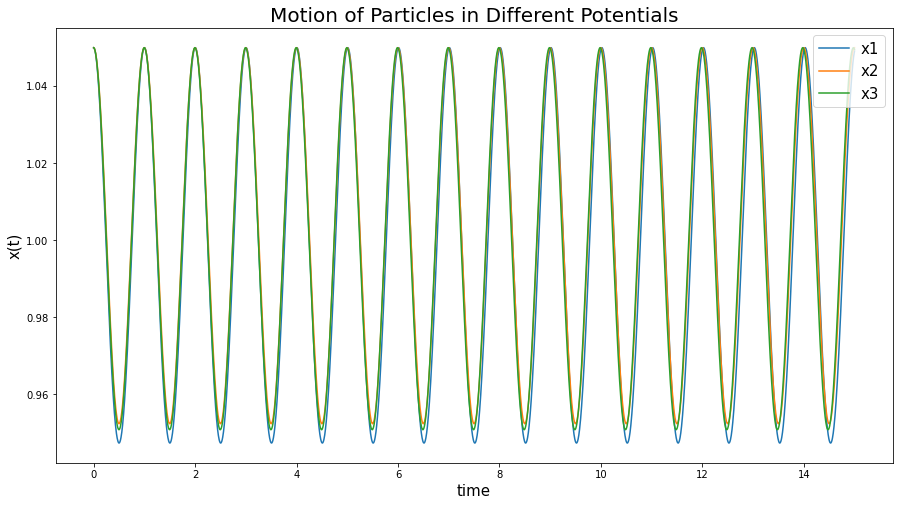

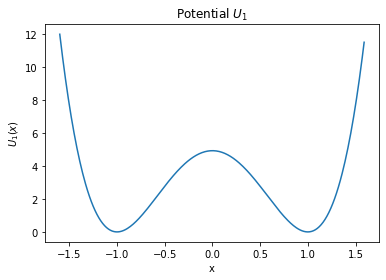

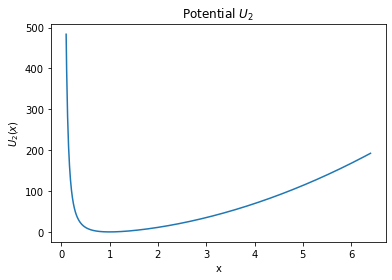

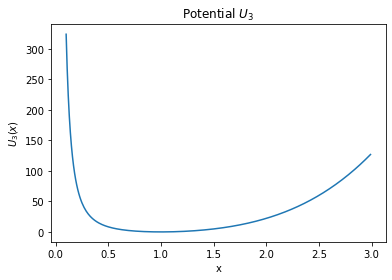

In [4]:
t0, tf, dt = 0, 15, 0.005
time1 = arange(t0, tf + dt, dt)

# All of the motions were computed using the Runge-Kutta Method
# The functions used to calculate the motions are listed above
y1 = x_motion_U1(time1, 1.05)[0]  # Since x_motion_Un returns x and v, we make sure to choose x by using [0] at the end
y2 = x_motion_U2(time1, 1.05)[0]
y3 = x_motion_U3(time1, 1.05)[0]

figure(figsize=(15, 8))
# Plotting the motion of the particles in the different potentials
plot(time1, y1, label='x1')
plot(time1, y2, label='x2')
plot(time1, y3, label='x3')
xlabel('time', fontsize=15), ylabel('x(t)', fontsize=15), title('Motion of Particles in Different Potentials', fontsize=20)
legend(fontsize=15, loc='upper right'), show()

# Plotting the potentials with respect to x
x1 = arange(-1.6, 1.6, 0.01)
u1 = 2 * pi**2 * ((x1**4)/4 - (x1**2)/2 + 1/4)
plot(x1, u1)
xlabel('x'), ylabel(f'$U_1(x)$'), title('Potential $U_1$') 
show()
x2 = arange(0.1, 6.4, 0.01)
u2 = pi**2 * (1/(2 * x2**2) + (x2**2)/2 - 1)
plot(x2, u2)
xlabel('x'), ylabel(f'$U_2(x)$'), title('Potential $U_2$') 
show()
x3 = arange(0.1, 3, 0.01)
u3 = (2 * pi **2)/3 * (1/(2 * x3**2) + (x3**4)/4 - 3/4)
plot(x3, u3)
xlabel('x'), ylabel(f'$U_3(x)$'), title('Potential $U_3$') 
show()

### Bullet Point 1: Show the period of oscillation is approximately 1

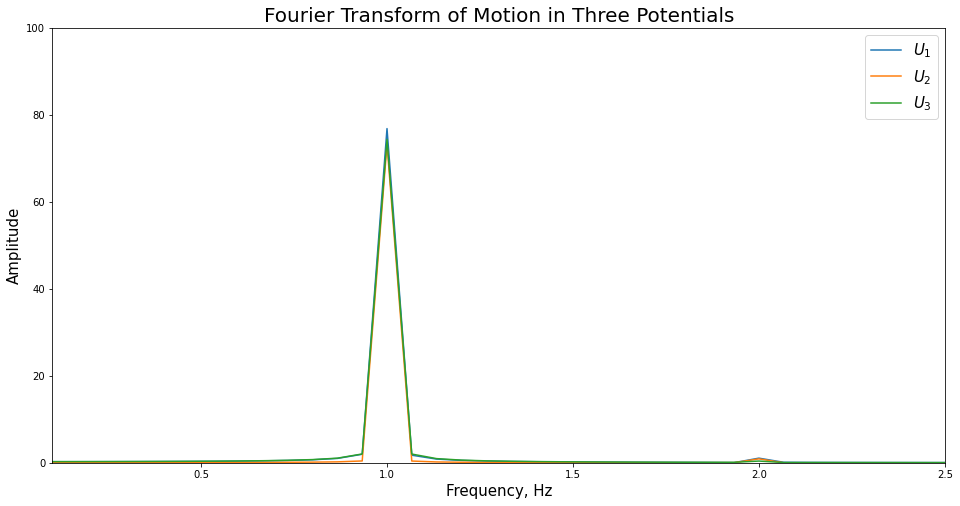

(<matplotlib.legend.Legend at 0x23ffedce0d0>, None)

In [5]:
t0, tf, dt = 0, 15, 0.005
time1 = arange(t0, tf + dt, dt)

# Getting the motion of the particle in different potentials
x1 = x_motion_U1(time1, 1.05)[0]
x2 = x_motion_U2(time1, 1.05)[0]
x3 = x_motion_U3(time1, 1.05)[0]

# Fourier function returns the fourier transform of the resultant motion
result1 = fourier(time1, x1)  # the fourier function returns frequency and magnitude
result2 = fourier(time1, x2)
result3 = fourier(time1, x3)

figure(figsize=(16, 8))
plot(result1[0], result1[1], label=f'$U_1$')
plot(result2[0], result2[1], label=f'$U_2$')
plot(result3[0], result3[1], label=f'$U_3$')

axis([0.1, 2.5, 0, 100])
xlabel('Frequency, Hz', fontsize=15), ylabel('Amplitude', fontsize=15)
title('Fourier Transform of Motion in Three Potentials', fontsize=20)
legend(fontsize=15), show()

As can be seen the period of oscillation is approximately 1 for all three potentials.

### Bullet Point 2: Show that in at least one of the potentials, starting the particle far from the minimum of the potential will not change the fundamental frequency

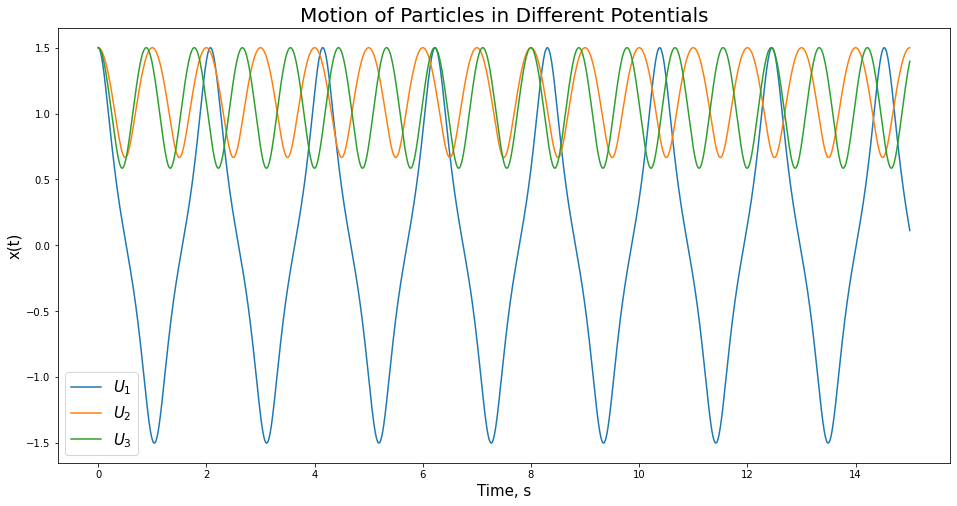

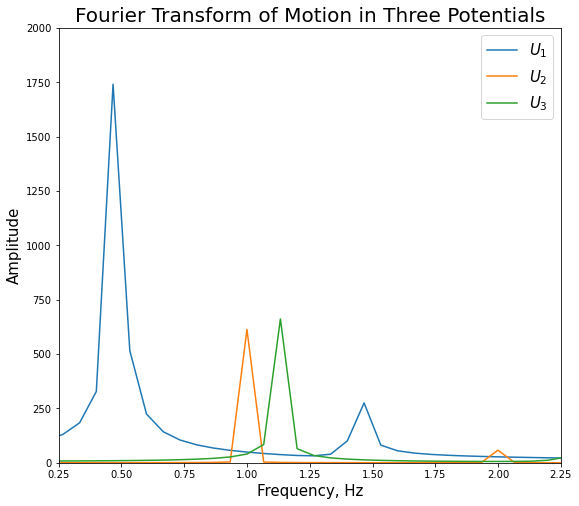

The new fundamental frequencies are:

Potentials       Fundamental Frequencies       Period
    U1                  0.4665                 2.1436
    U2                  0.9997                 1.0003
    U3                  1.1330                 0.8826


In [6]:
t0, tf, dt = 0, 15, 0.005
time1 = arange(t0, tf + dt, dt)


# Getting the motion of the particle when started farther from the minimum and its respective fourier transform
#U1
x1_2 = x_motion_U1(time1, 1.5)[0]
result1f = fourier(time1, x1_2) 

# U2
x2_2 = x_motion_U2(time1, 1.5)[0]
result2f = fourier(time1, x2_2)

# U3
x3_2 = x_motion_U3(time1, 1.5)[0]
result3f = fourier(time1, x3_2)

# Plotting the motion when x_0 is farther
figure(figsize=(16, 8))
plot(time1, x1_2, label=f'$U_1$')
plot(time1, x2_2, label=f'$U_2$')
plot(time1, x3_2, label=f'$U_3$')
xlabel('Time, s', fontsize=15), ylabel('x(t)', fontsize=15)
title('Motion of Particles in Different Potentials', fontsize=20)
legend(fontsize=15), show()


# Plotting the fourier transform of the results
figure(figsize=(9, 8))
plot(result1f[0], result1f[1], label=f'$U_1$')
plot(result2f[0], result2f[1], label=f'$U_2$')
plot(result3f[0], result3f[1], label=f'$U_3$'), legend(), axis([0.25, 2.25, 0, 2000])#, show()
xlabel('Frequency, Hz', fontsize=15), ylabel('Amplitude', fontsize=15)
title('Fourier Transform of Motion in Three Potentials', fontsize=20)
legend(fontsize=15), show()

print('The new fundamental frequencies are:')
U_list = ['U1', 'U2', 'U3']
frequency_list = [result1f, result2f, result3f]


print()
print('Potentials       Fundamental Frequencies       Period')
i = 1

for item in frequency_list:
    max_pos = argrelmax(item[1])[0]  # argrelmax returns a tuple, but we only want the first array in it; hence [0]
    print(f"    {U_list[i-1]}                  {item[0][max_pos[0]]:.4f}                 {1/(item[0][max_pos[0]]):.4f}")
    # item[0] accesses the positions of the time values and returns an array; max_pos[0] is the first position in
    # the array of the values of the local maxima;
    i += 1

Here we can see that when we start the particle far from the minimum of the potential U2, the period of oscillation is still approximately 1. Thus the fundamental frequency does not change.  

### Bullet Point 3: In at least one of the potentials, starting the particle far from the minimum of the potential will change the fundamental frequency of oscillations
### If the energy is "small" the shift $\Delta$ is proportional to the energy of the particle E

As see in the previous graphs, starting the particle far from the minimum of the potentials U1 and U3 will change the fundamental frequency of oscillations.

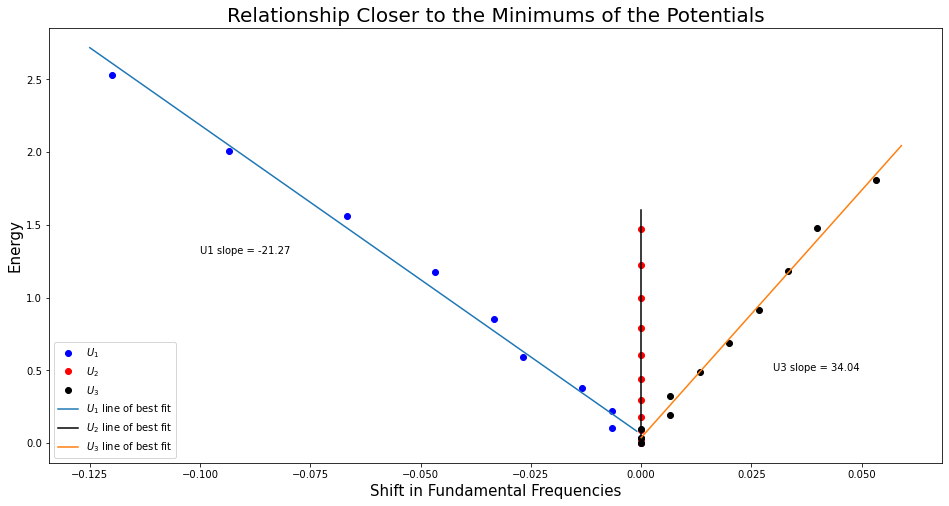

<Figure size 1152x576 with 0 Axes>

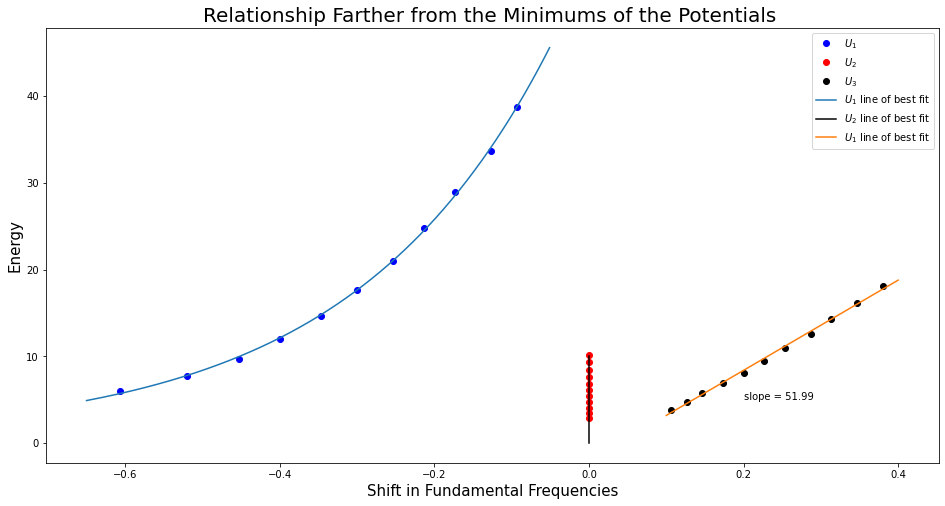

(<matplotlib.legend.Legend at 0x23f812be430>, None)

In [7]:
# Plotting the energy vs the shifts in fundamental frequency when starting the particle near the minimum
figure(figsize=(16, 8))
x0_list1 = arange(1.01, 1.31, 0.03)
result1 = energy_frequency(x0_list1)  # energy_frequency returns a list of energies and a list of fundamental frequencies 
                                      # for each potential when given a list of starting positions, x0_list 

plot(result1[0], result1[1], 'bo', label=f'$U_1$')
plot(result1[2], result1[3], 'ro', label=f'$U_2$')
plot(result1[4], result1[5], 'ko', label=f'$U_3$')

# Best fit lines 
params, param_cov = curve_fit(linefit, result1[0], result1[1])
x_data = arange(-0.125, 0, 0.001)
line = params[0] * x_data + params[1]
text(-0.1, 1.3, f"U1 slope = {params[0]:.2f}")
plot(x_data, line, label=f'$U_1$ line of best fit')

plot([0, 0], [0, 1.6], 'k-', label=f'$U_2$ line of best fit')

params, param_cov = curve_fit(linefit, result1[4], result1[5])
x_data = arange(0, 0.06, 0.001)
line = params[0] * x_data + params[1]
text(0.03, 0.5, f"U3 slope = {params[0]:.2f}")
plot(x_data, line, label=f'$U_3$ line of best fit')

xlabel('Shift in Fundamental Frequencies', fontsize=15), ylabel('Energy', fontsize=15)
title('Relationship Closer to the Minimums of the Potentials', fontsize=20)
legend(), show()


# Plotting the energy vs the shifts in fundamental frequency when starting the particle far from the minimum
figure(figsize=(16, 8))
x0_list2 = arange(1.45, 2, 0.05)
result2 = energy_frequency(x0_list2)
figure(figsize=(16, 8))
plot(result2[0], result2[1], 'bo', label=f'$U_1$')
plot(result2[2], result2[3], 'ro', label=f'$U_2$')
plot(result2[4], result2[5], 'ko', label=f'$U_3$')

params, param_cov = curve_fit(expfit, result2[0], result2[1])
x_data = arange(-0.65, -0.05, 0.001)
line = params[0] * exp(params[1] * x_data) + params[2]
plot(x_data, line, label=f'$U_1$ line of best fit')

plot([0, 0], [0, 10], 'k-', label=f'$U_2$ line of best fit')

params, param_cov = curve_fit(linefit, result2[4], result2[5])
# x_data = arange(0.1, 0.75, 0.001)   # Original Data
x_data = arange(0.1, 0.4, 0.001)
line = params[0] * x_data + params[1]
text(0.2, 5, f"slope = {params[0]:.2f}")
plot(x_data, line, label=f'$U_1$ line of best fit')

xlabel('Shift in Fundamental Frequencies', fontsize=15), ylabel('Energy', fontsize=15)
title('Relationship Farther from the Minimums of the Potentials ', fontsize=20),
legend(), show()



Graph 1 shows that starting the particle closer to the minimum of the $U_1$ and $U_3$ potentials results in a linear relationship; thus, when starting the particle closer to the minimum of the potentials, the shift $\Delta$ is proportional to the energy when energy is small. 

However, starting the particle farther away from the minimum shows that relationship between shift in fundamental frequency and energy in the case of $U_1$ is more exponential than linear. Likewise, for the potential $U_3$, we also begin to notice a very slight exponential trend but is still mostly linear.

We previuosly showed that in case of potential $U_2$, starting the particle far from the minimum of the potential will not change the fundamental frequency of oscillation. This relationship is also seen here, and demonstrates that the only effect starting position has in the case of $U_2$ is the resulting energy of the particle.


### Bullet Point 4: In all three potentials, at low energies $<x>-1$ proportional to E

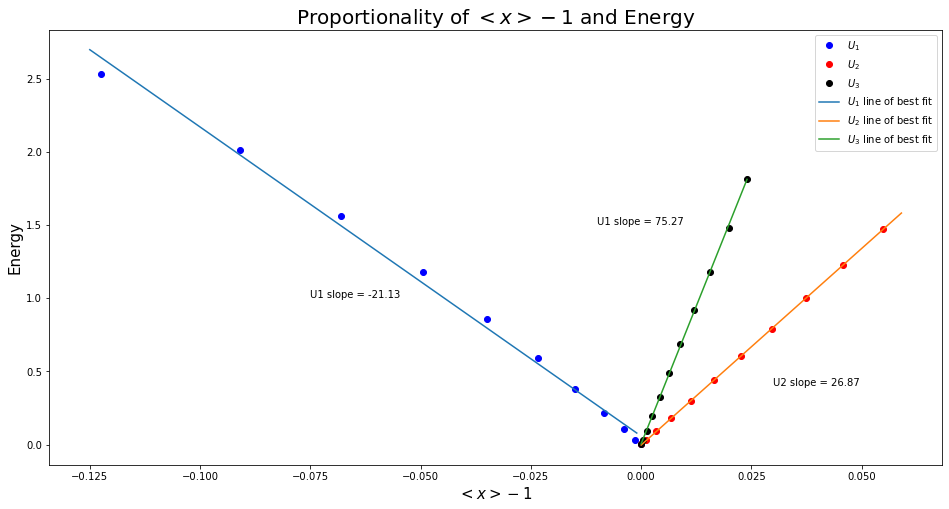

(Text(0.5, 1.0, 'Proportionality of $<x> - 1$ and Energy'),
 None)

In [8]:
t0, tf, dt = 0, 150, 0.005
time = arange(t0, tf + dt, dt)

x0_list1 = arange(1.01, 1.31, 0.03)
result = energy_frequency(x0_list1)  # we will be using the energies from the 6-d array this returns
                                     # to access the energies, use result[1], [3], [5]
x_tavg_u1 = []
x_tavg_u2 = []
x_tavg_u3 = []
for x0 in x0_list1:
    x1 = x_motion_U1(time, x0)[0]
    x2 = x_motion_U2(time, x0)[0]
    x3 = x_motion_U3(time, x0)[0]

    x_tavg_u1.append(x_tavg(time, x1) - 1)  # x_tavg returns the time-averaged value for the motion of a particle
    x_tavg_u2.append(x_tavg(time, x2) - 1)
    x_tavg_u3.append(x_tavg(time, x3) - 1)

figure(figsize=(16, 8))
# Plotting the energy vs the time-averaged value for the motion 
plot(x_tavg_u1, result[1], 'bo', label=f'$U_1$')
plot(x_tavg_u2, result[3], 'ro', label=f'$U_2$')
plot(x_tavg_u3, result[5], 'ko', label=f'$U_3$')

# Best fit relationships
# For U1
params, param_cov = curve_fit(linefit, x_tavg_u1, result[1])
x_data = arange(-0.125, 0, 0.001)
line = params[0] * x_data + params[1]
text(-0.075, 1, f"U1 slope = {params[0]:.2f}")
plot(x_data, line, label=f'$U_1$ line of best fit')

# For U2
params, param_cov = curve_fit(linefit, x_tavg_u2, result[3])
x_data = arange(0, 0.06, 0.001)
line = params[0] * x_data + params[1]
text(0.03, 0.4, f"U2 slope = {params[0]:.2f}")
plot(x_data, line, label=f'$U_2$ line of best fit')

# For U3
params, param_cov = curve_fit(linefit, x_tavg_u3, result[5])
x_data = arange(0, 0.025, 0.001)
line = params[0] * x_data + params[1]
text(-0.01, 1.5, f"U1 slope = {params[0]:.2f}")
plot(x_data, line, label=f'$U_3$ line of best fit')

xlabel(f'$<x> - 1$', fontsize=15), ylabel('Energy', fontsize=15)
title(r'Proportionality of $<x> - 1$ and Energy', fontsize=20), legend(), show()

### Bullet Point 5: In the absence of a driving force, if you start the particle off away from equilibrium the motion will be an oscillation with exponentially decaying amplitude
### The time it takes for the amplitude to decay to half its initial value is inversely proportional to $\gamma$

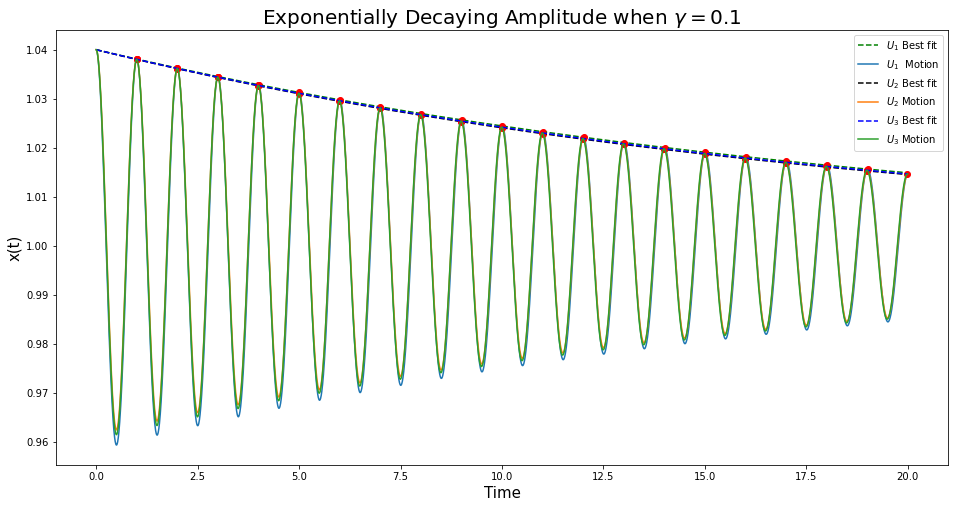

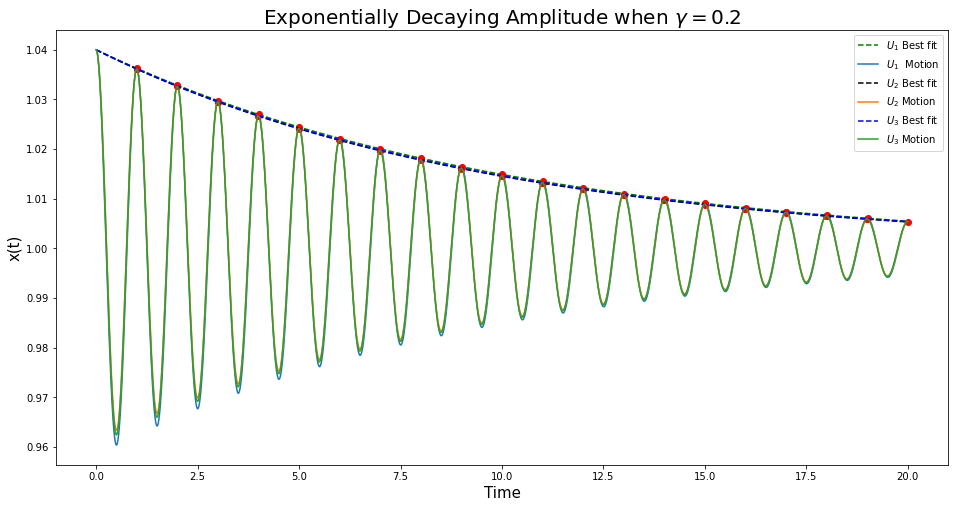

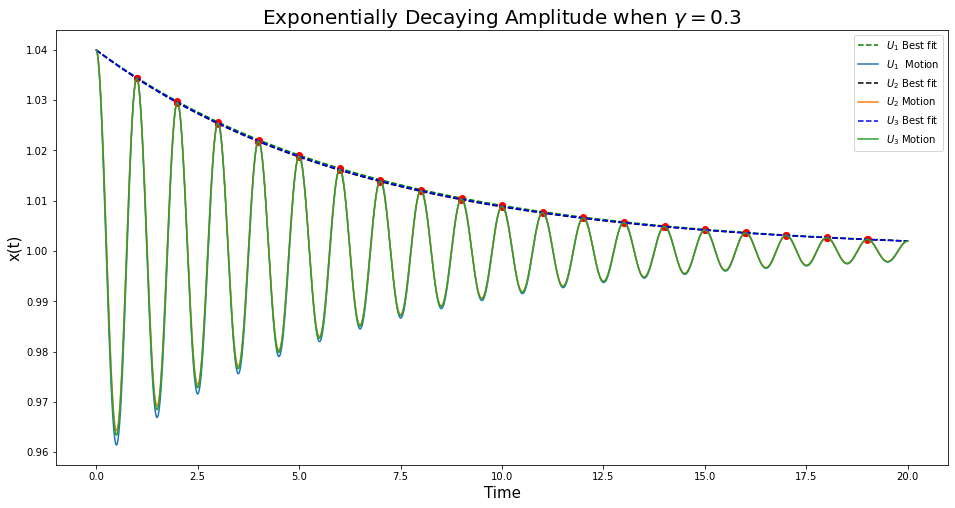

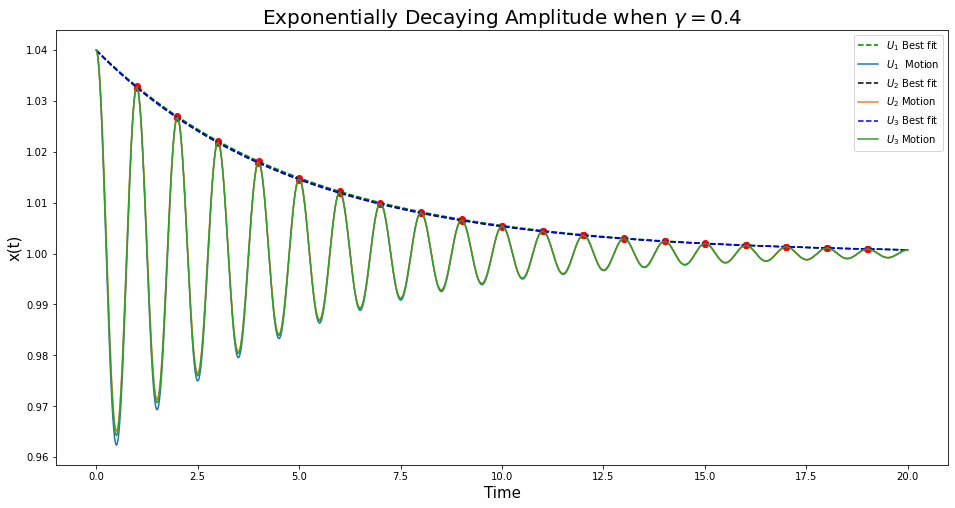

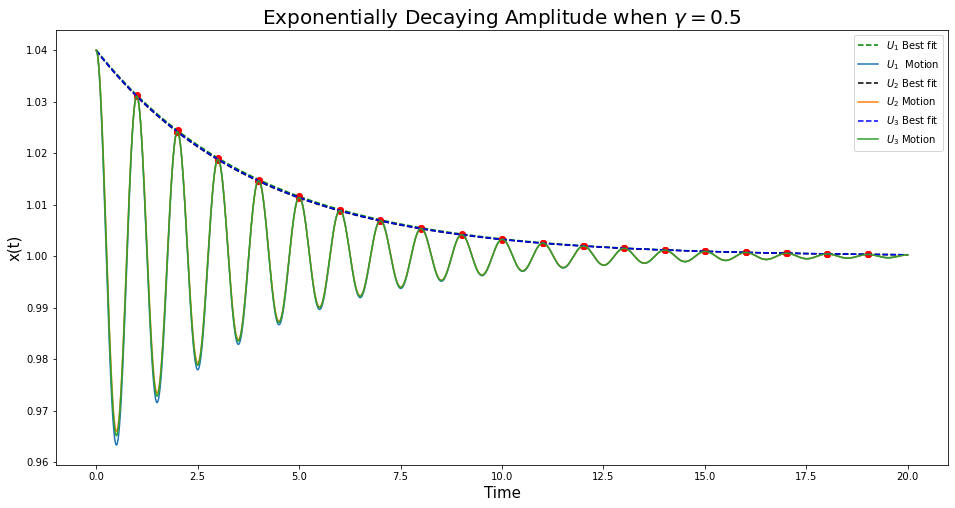

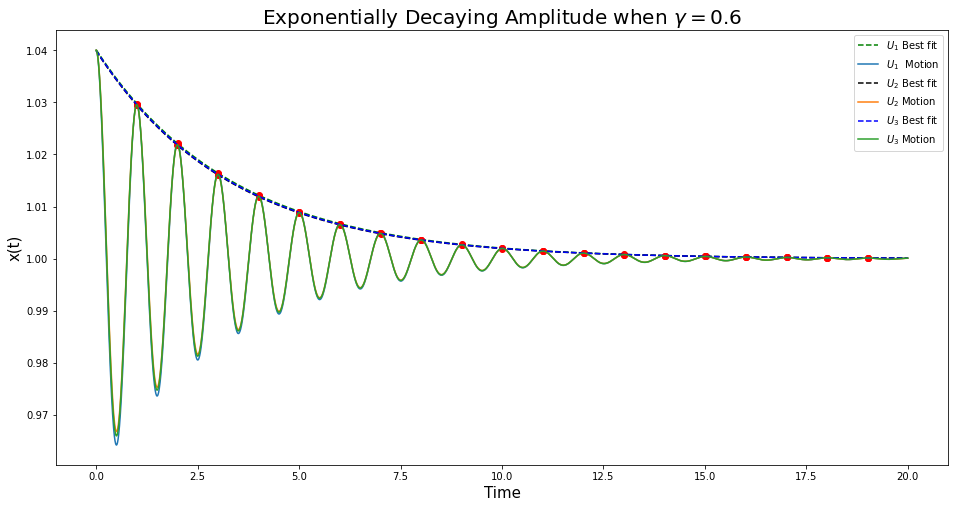

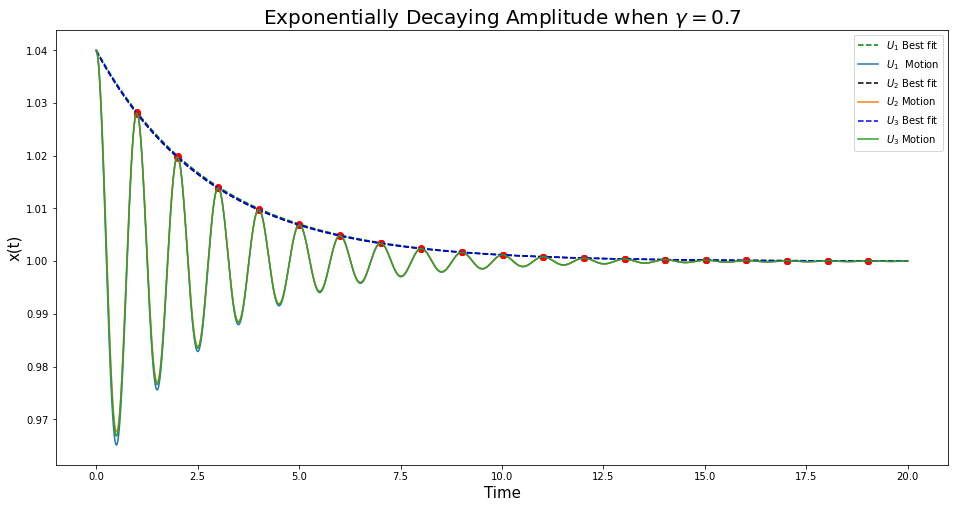

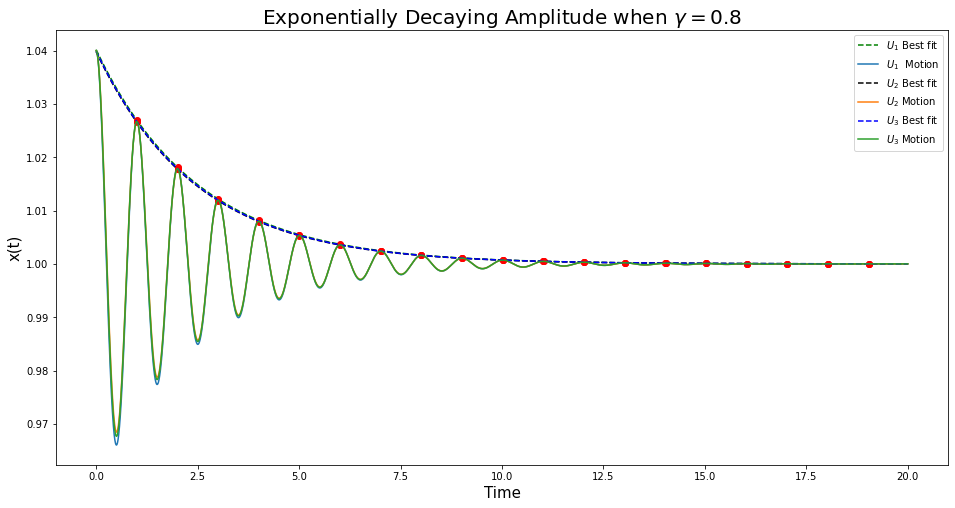

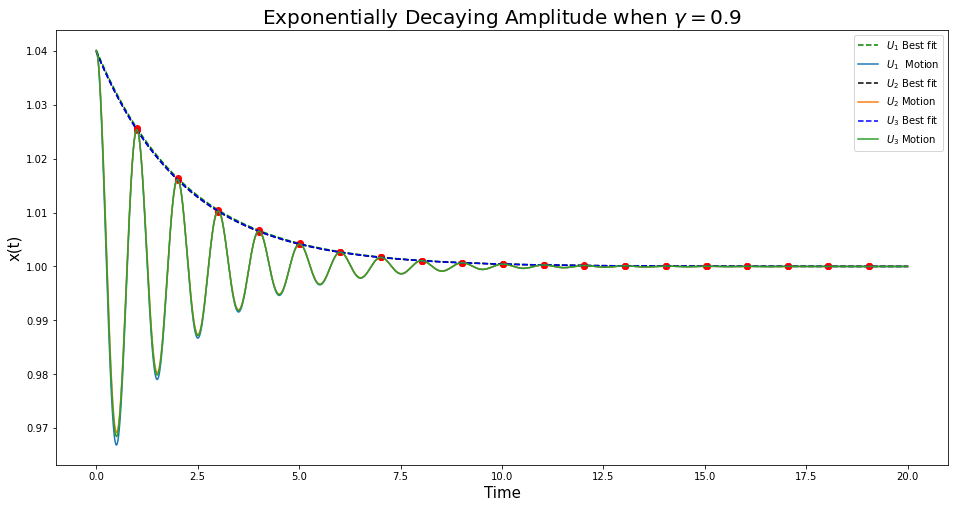

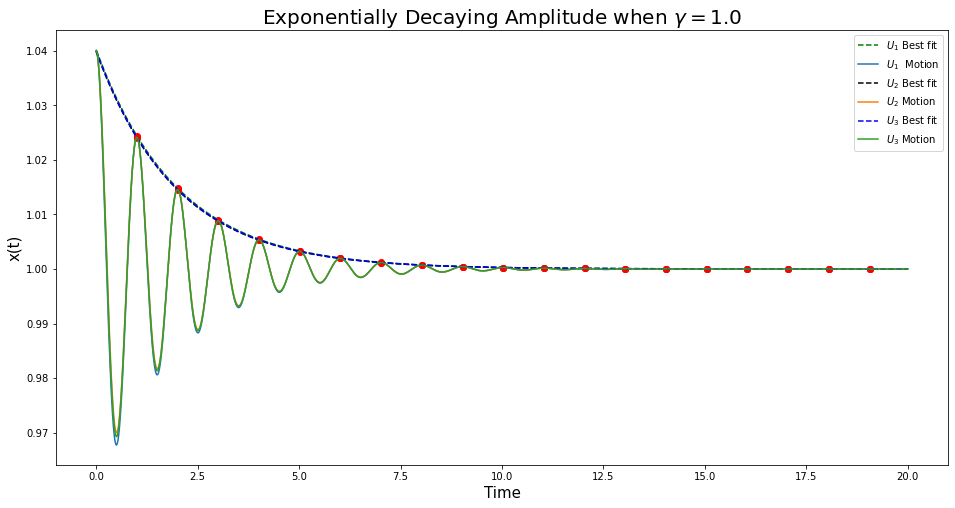

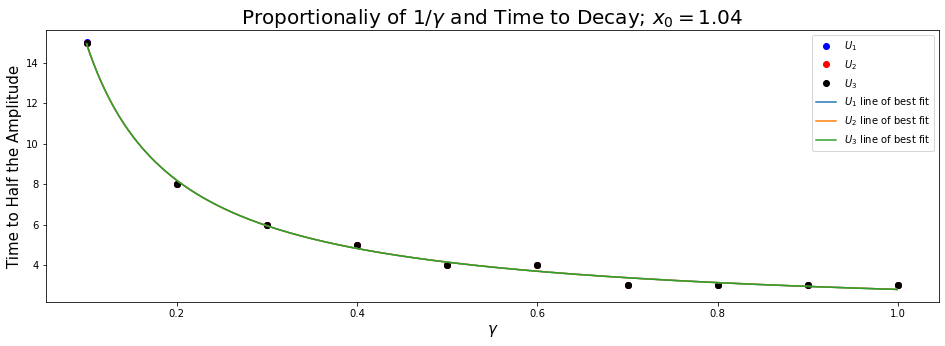

(Text(0.5, 1.0, 'Proportionaliy of 1/$\\gamma$ and Time to Decay; $x_0=1.04$'),
 None)

In [9]:
# We will first examine the case that there is NO driving force, F0 = 0
t0, tf, dt = 0, 20, 0.005  # We used a smaller time range here because otherwise the shape becomes obscured
time = arange(t0, tf + dt, dt)


gamma_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]  # list of gamma values to try


for g in gamma_list:
    result1 = x_motion2_U1(time, 1.04, 0, g, 0)  # Notice these functions incorporate damping and driving; still return x, v
    result2 = x_motion2_U2(time, 1.04, 0, g, 0)
    result3 = x_motion2_U3(time, 1.04, 0, g, 0)
    
    figure(figsize=(16,8))
    
    # For U1
    local_max1 = result1[0][argrelmax(result1[0])[0]]  # recall, result1[0] is the list of x values. 
                                                       # [argrelmax(result2[0])[0]] returns the positions of the max values
    time_max1 = time[argrelmax(result1[0])[0]] 
    
    params, param_cov = curve_fit(expdecay, time_max1, local_max1)
    decay_graph1 = params[0] * exp(-params[1] * time) + params[2] 
    plot(time_max1, local_max1, 'ro')  # Plotting the maximums of the relative maximums of the motion 
    plot(time, decay_graph1, '--g', label=f'$U_1$ Best fit')  # Plotting the best-fit exponential decay of the amplitudes 
    plot(time, result1[0], label=f'$U_1$  Motion')  # Plotting the actual motion of the graph 

    
    # For U2
    local_max2 = result2[0][argrelmax(result2[0])[0]]
    time_max2 = time[argrelmax(result2[0])[0]]  
    
    params, param_cov = curve_fit(expdecay, time_max2, local_max2)
    decay_graph2 = params[0] * exp(-params[1] * time) + params[2]
    plot(time_max2, local_max2, 'ro')
    plot(time, decay_graph2, '--k', label=f'$U_2$ Best fit')
    plot(time, result2[0], label=f'$U_2$ Motion')

    
    # For U3
    local_max3 = result3[0][argrelmax(result3[0])[0]]
    time_max3 = time[argrelmax(result3[0])[0]]  
    
    params, param_cov = curve_fit(expdecay, time_max3, local_max3)
    decay_graph3 = params[0] * exp(-params[1] * time) + params[2]
    plot(time_max3, local_max3, 'ro')
    plot(time, decay_graph3, '--b', label=f'$U_3$ Best fit')
    plot(time, result3[0], label=f'$U_3$ Motion')
    xlabel('Time', fontsize=15), ylabel('x(t)', fontsize=15)
    title(f'Exponentially Decaying Amplitude when $\gamma = {g}$', fontsize=20)
    legend(), show()
    


# To show time it takes for the amplitude to decay to half its initial value is inversely proportional to 𝛾
time_results = time_to_decay(time, gamma_list, 1.04)  # returns 3 lists of decay times for a particle at x_0 = 1.04

# Plot the relationship between different gamma values and the resultant time to decay for each potential
figure(figsize=(16, 5))
plot(gamma_list, time_results[0], 'bo', label=f'$U_1$')
plot(gamma_list, time_results[1], 'ro', label=f'$U_2$')
plot(gamma_list, time_results[2], 'ko', label=f'$U_3$')

# Best-fit relationships
# For U1
params, param_cov = curve_fit(inverse, gamma_list, time_results[0])
x_data = arange(0.1, 1, 0.001)
line = params[0] * 1/x_data + params[1]
plot(x_data, line, label=f'$U_1$ line of best fit')

# For U2
params, param_cov = curve_fit(inverse, gamma_list, time_results[1])
line = params[0] * 1/x_data + params[1]
plot(x_data, line, label=f'$U_2$ line of best fit')

# For U2
params, param_cov = curve_fit(inverse, gamma_list, time_results[2])
line = params[0] * 1/x_data + params[1]
plot(x_data, line, label=f'$U_3$ line of best fit')

legend(), xlabel(r'$\gamma$', fontsize=15), ylabel('Time to Half the Amplitude', fontsize=15)
title(f'Proportionaliy of 1/$\gamma$ and Time to Decay; $x_0=1.04$', fontsize=20), show()
    

### Bullet Point 6: In the presence of a small driving force, it will settle into a state of steady oscillations at the same frequency as the driving force.
### The amplitude will be proportional to the amplitude of the driving force.

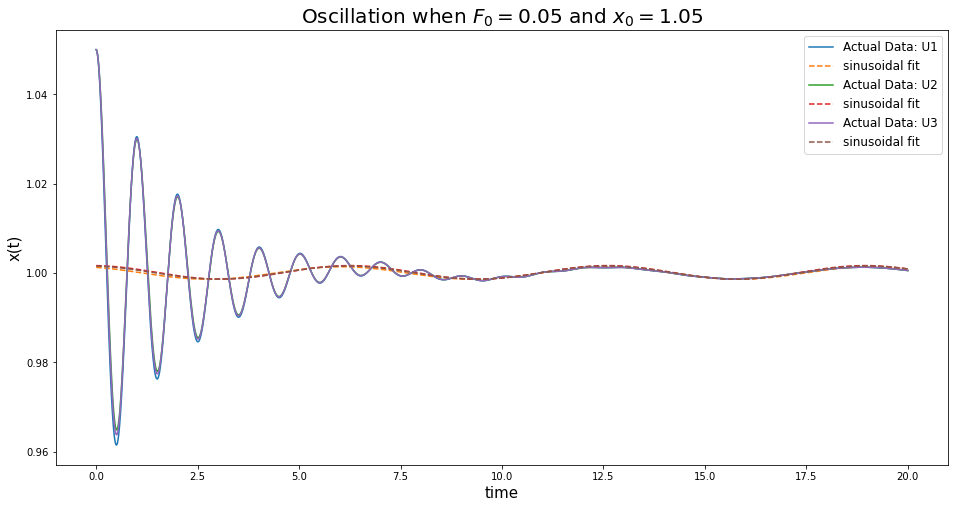

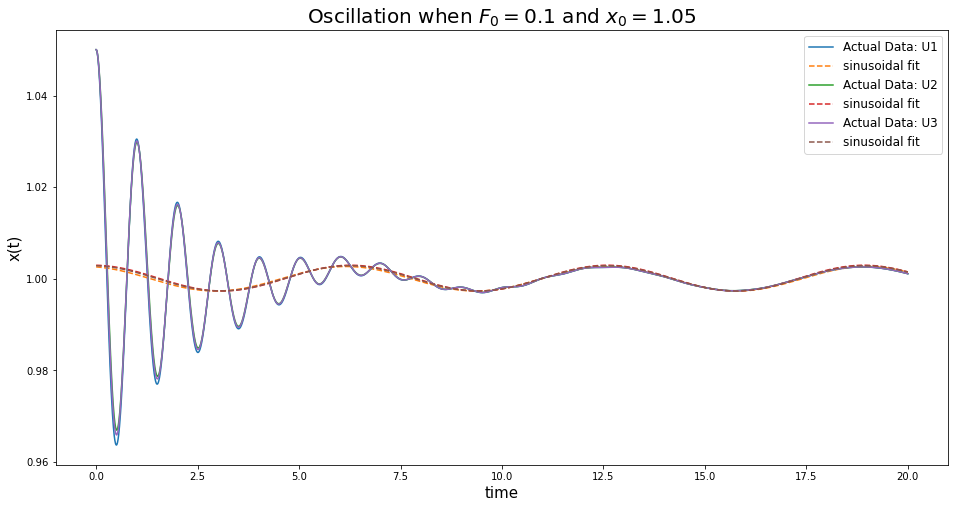

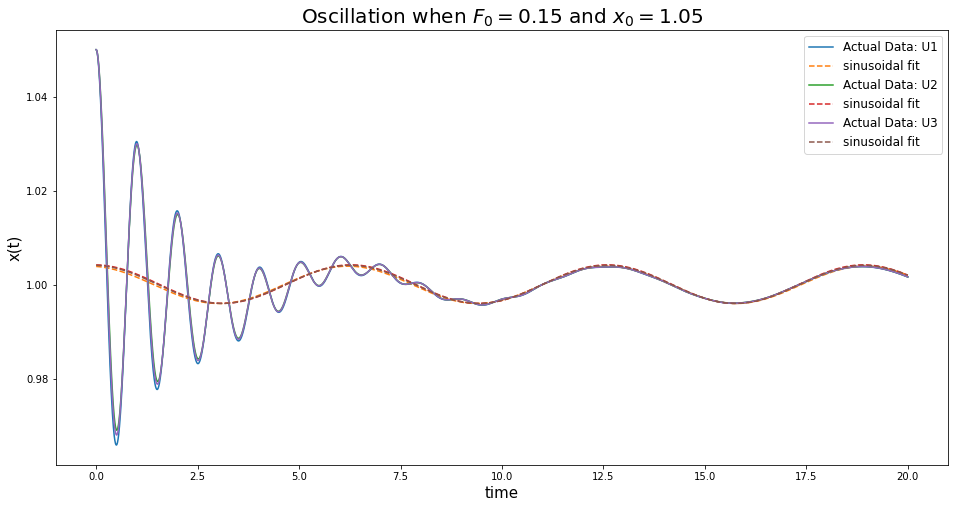

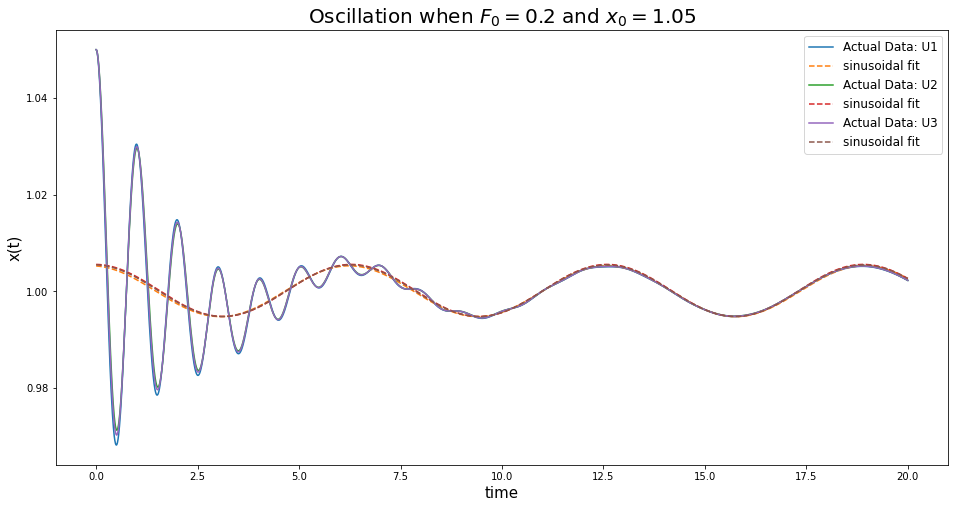

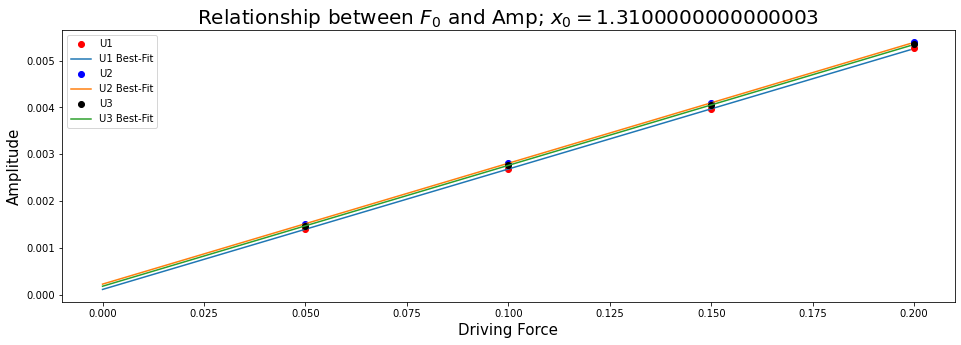

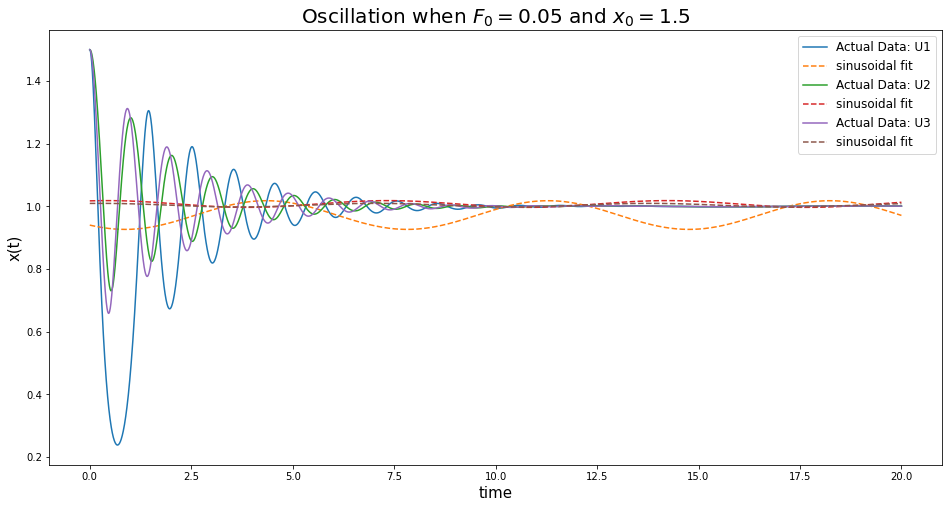

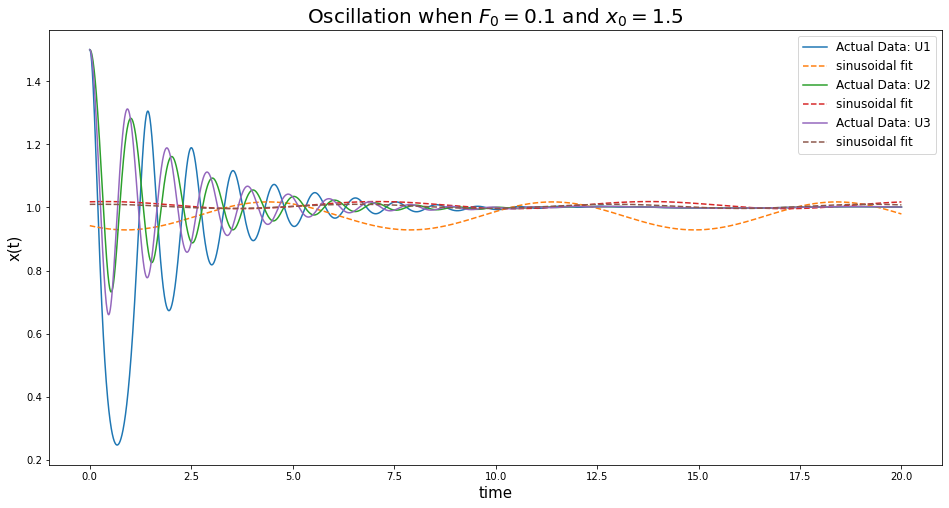

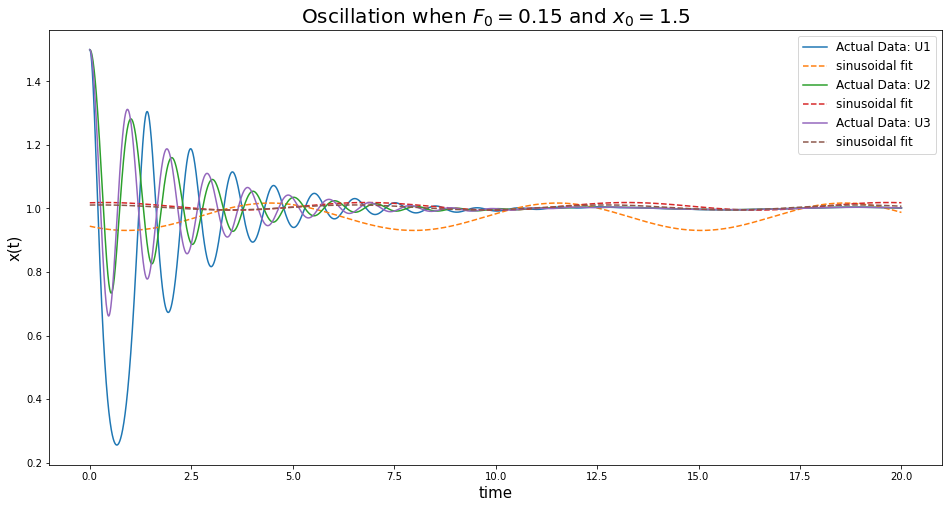

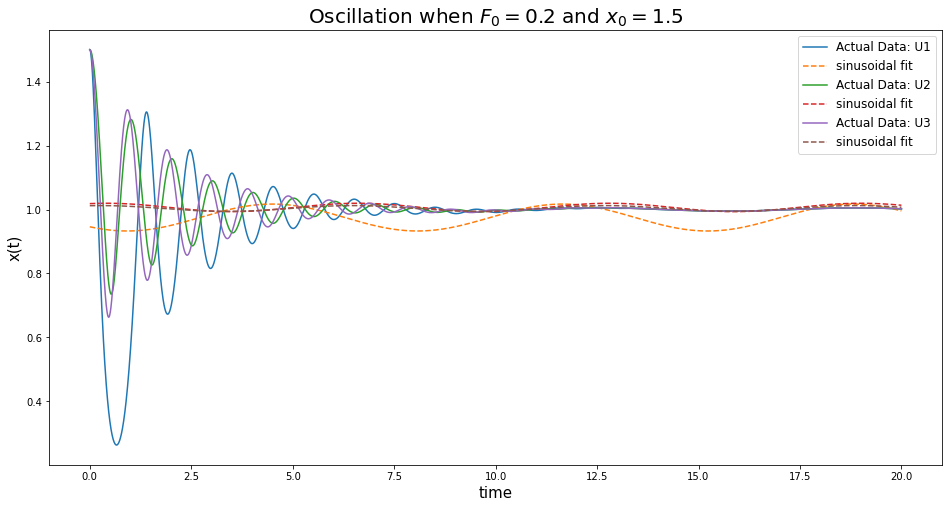

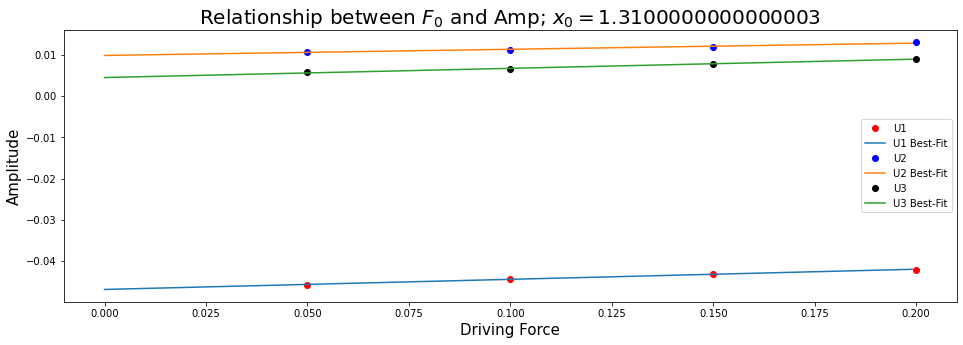

In [10]:
t0, tf, dt = 0, 20, 0.005
time = arange(t0, tf + dt, dt)


f0_list = [0.05, 0.1, 0.15, 0.2]  # list of different driving forces

amp_result = amplitude_with_driving_force(time, f0_list, 1.05)  
# amplitude_with_driving_force returns 3 lists with amplitudes, 1 for each potential

# This is to show the relationship between amplitude and the driving force
# Line-fit
x_data = arange(0, 0.2, 0.001)

figure(figsize=(16,5))
params, param_cov = curve_fit(linefit, f0_list, amp_result[0])
line1 = params[0] * x_data + params[1]
plot(f0_list, amp_result[0], 'ro', label='U1' )  # plotting the 
plot(x_data, line1, label='U1 Best-Fit')

params, param_cov = curve_fit(linefit, f0_list, amp_result[1])
line2 = params[0] * x_data + params[1]
plot(f0_list, amp_result[1], 'bo', label='U2' )
plot(x_data, line2, label='U2 Best-Fit')

params, param_cov = curve_fit(linefit, f0_list, amp_result[2])
line3 = params[0] * x_data + params[1]
plot(f0_list, amp_result[2], 'ko', label='U3' )
plot(x_data, line3, label='U3 Best-Fit')

legend(), xlabel('Driving Force', fontsize=15), ylabel('Amplitude', fontsize=15)
title(f'Relationship between $F_0$ and Amp; $x_0 = {x0}$', fontsize=20)
show()

amp_result = amplitude_with_driving_force(time, f0_list, 1.5) 



# This is to show the relationship between amplitude and the driving force
# Line-fit
x_data = arange(0, 0.2, 0.001)

figure(figsize=(16,5))
params, param_cov = curve_fit(linefit, f0_list, amp_result[0])
line1 = params[0] * x_data + params[1]
plot(f0_list, amp_result[0], 'ro', label='U1' )  # plotting the 
plot(x_data, line1, label='U1 Best-Fit')

params, param_cov = curve_fit(linefit, f0_list, amp_result[1])
line2 = params[0] * x_data + params[1]
plot(f0_list, amp_result[1], 'bo', label='U2' )
plot(x_data, line2, label='U2 Best-Fit')

params, param_cov = curve_fit(linefit, f0_list, amp_result[2])
line3 = params[0] * x_data + params[1]
plot(f0_list, amp_result[2], 'ko', label='U3' )
plot(x_data, line3, label='U3 Best-Fit')

legend(), xlabel('Driving Force', fontsize=15), ylabel('Amplitude', fontsize=15)
title(f'Relationship between $F_0$ and Amp; $x_0 = {x0}$', fontsize=20)
show()
